In [2]:
import numpy as np
import pandas as pd
import math
from scipy.stats import *
import scipy as sp

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


In [4]:
x=[1,2,3,4,5]
np.mean(x)

3.0

In [8]:
np.array(x).mean()
pd.Series(x).mean()

3.0

3.000

In [22]:
df=pd.read_csv('c:\workspace\data\ch2_scores_em.csv',index_col='student number')

#df의 처음 5행 표시
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [23]:
df.shape

(50, 2)

In [24]:
#sum(),len() 함수를 이용하여 산술평균 계산
#영어 과목의 평균 계산
sum(df['english'])/len(df['english'])

58.380

In [25]:
#numpy의 mean()함수 이용하여 산술평균 계산
np.mean(df['english'])

58.380

In [ ]:
#pandas의 데이터프레임에서 mean()함수 이용하여 

In [19]:
data = [2,8,3]

In [27]:
#산술 평균
np.mean(data)

4.333333333333333

In [30]:
#조화평균 계산
data = np.array([80,120])
1/data
len(data)/np.sum(1/data)

array([0.013, 0.008])

95.99999999999999

In [29]:
#scipy.stat.hmean(a[,axis,dtype]) 이용하여 조화평균 계산
hmean(data)

95.99999999999999

In [31]:
np.average(np.arange(1,5))
np.average(np.arange(1,11),weights=np.arange(10,0,-1))

2.5

4.0

In [32]:
np.mean(np.arange(1,11))

5.5

In [34]:
#예제 데이터
scores=np.array(df['english'])
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66],
      dtype=int64)

In [36]:
#순서 통계량
sorted_scores=np.sort(scores)
sorted_scores

array([37, 37, 41, 42, 42, 45, 47, 47, 48, 49, 51, 52, 54, 54, 54, 55, 55,
       55, 56, 56, 57, 57, 57, 57, 57, 58, 61, 61, 62, 62, 62, 63, 64, 64,
       65, 65, 65, 65, 66, 66, 66, 67, 68, 69, 70, 70, 71, 73, 75, 79],
      dtype=int64)

In [37]:
#median 계산식
n=len(sorted_scores)
if n%2==0:
    x1=sorted_scores[n//2-1]
    x2=sorted_scores[n//2]
    median=(x1+x2)/2
else:
    median=sorted_scores[(n+1)//2-1]
median

57.5

In [38]:
sorted_scores[24],sorted_scores[25]

(57, 58)

In [39]:
#numpy의 median() 함수
np.median(scores)

57.5

In [40]:
#pandas.DataFrame의 median() 함수
df['english'].median()

57.500

In [43]:
np.random.seed(3)
income=np.random.normal(2000000,500000,100)
income[:10]

array([2894314.237, 2218254.925, 2048248.734, 1068253.648, 1861305.899,
       1822620.51 , 1958629.259, 1686499.662, 1978090.916, 1761390.985])

In [44]:
#평균 소득
np.mean(income)

1945681.4627969689

In [45]:
income = np.append(income, 10**9)

In [46]:
#평균 소득
np.mean(income)

11827407.38890789

In [47]:
#중앙값
np.median(income)

1919743.318406538

In [48]:
#scipy.stats.trim_mean(a,proportiontocut[,axis])이용
trim_mean(income, 0.2)

1941471.0812132563

In [49]:
np.random.seed(3)
data=np.random.choice(['A','B','C'],1000)
#A,B,C라는 요소로 이루어진 데이터
data[:10]
len(data)

array(['C', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'C', 'B'], dtype='<U1')

1000

In [50]:
mode(data)

ModeResult(mode=array(['A'], dtype='<U1'), count=array([350]))

In [51]:
#최빈값
mode(data).mode

array(['A'], dtype='<U1')

In [52]:
#최빈값의 빈도
mode(data).count

array([350])

In [53]:
pd.Series(data).value_counts()

A    350
B    328
C    322
dtype: int64

In [55]:
pd.Series(data).value_counts().index[0]
pd.Series(data).value_counts()[0]

'A'

350

In [67]:
np.random.seed(123)
data=np.random.normal(100,20,size=1000)
data[:10]

array([ 78.287, 119.947, 105.66 ,  69.874,  88.428, 133.029,  51.466,
        91.422, 125.319,  82.665])

In [68]:
sorted(data)[0],sorted(data)[-1]

(35.37889984161376, 171.43158436052622)

In [69]:
#제1사분위수(하사분위수,Q1)
np.percentile(data,25)

86.30886819268538

In [70]:
#제3사분위수(상사분위수,Q3)
np.percentile(data,75)

113.37731495435875

{'whiskers': [<matplotlib.lines.Line2D at 0x2130fd1dfa0>,
 'caps': [<matplotlib.lines.Line2D at 0x2130fd3e640>,
 'boxes': [<matplotlib.lines.Line2D at 0x2130fd1db50>],
 'medians': [<matplotlib.lines.Line2D at 0x2130fd3ed60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2130fd49130>],
 'means': []}

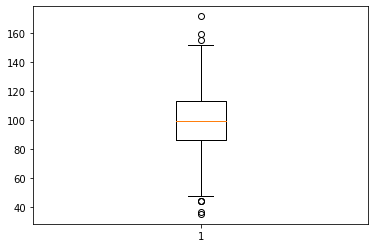

In [73]:
import matplotlib.pyplot as plt
plt.boxplot(data)

In [74]:
describe(data)
describe(df['english'])#표본데이터의 기술 통계량

DescribeResult(nobs=1000, minmax=(35.37889984161376, 171.43158436052622), mean=99.20871727838417, variance=401.03130940853094, skewness=-0.029040113501245676, kurtosis=-0.02543852877769215)

DescribeResult(nobs=50, minmax=(37, 79), mean=58.38, variance=96.03632653061224, skewness=-0.31679325324962426, kurtosis=-0.38870454364589113)

In [76]:
df['english'].describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
Name: english, dtype: float64

In [77]:
describe(df['english'],ddof=0) #모집단 데이터에 대한 기술통계량

DescribeResult(nobs=50, minmax=(37, 79), mean=58.38, variance=94.1156, skewness=-0.31679325324962426, kurtosis=-0.38870454364589113)

In [79]:
import numpy as np
import pandas as pd
from scipy.stats import*

In [80]:
import numpy as np
# numpy float 출력옵션 변경
# np.set_printoptions(precision=3)
# np.set_printoptions(precision=20, suppress=True)
# pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})


In [81]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"


In [82]:
np.random.seed(123)
data=np.random.normal(100,20,size=1000)
data[:10]

array([78.287, 119.947, 105.660, 69.874, 88.428, 133.029, 51.466, 91.422,
       125.319, 82.665])

In [83]:
np.min(data),np.max(data)

(35.37889984161376, 171.43158436052622)

In [85]:
np.max(data)-np.min(data)

136.05268451891246

In [86]:
np.ptp(data)

136.05268451891246

In [87]:
#중간 범위 계산
(np.max(data)+np.min(data))/2

103.40524210106999

In [88]:
np.quantile(data,0.75)-np.quantile(data,0.25)

27.06844676167337

In [89]:
iqr(data)

27.06844676167337

In [91]:
data-np.mean(data)

array([-20.921, 20.738, 6.451, -29.335, -10.781, 33.820, -47.742, -7.787,
       26.110, -16.544, -12.786, -1.103, 30.619, -11.987, -8.088, -7.896,
       44.910, 44.527, 20.872, 8.515, 15.539, 30.606, -17.925, 24.308,
       -24.286, -11.964, 18.933, -27.782, -2.010, -16.444, -4.321,
       -55.180, -34.639, -13.206, 19.341, -2.681, 0.848, 14.556, -16.799,
       6.464, -15.316, -33.762, -7.027, 12.267, 7.563, 0.555, 48.639,
       9.050, 20.366, 45.554, -25.090, -19.984, 35.666, -15.170, 1.385,
       22.178, 18.605, 35.889, 30.704, 22.179, -14.663, 16.689, 7.077,
       -25.734, 29.137, 16.936, 1.701, -3.871, -23.175, 4.782, 10.160,
       -15.832, 24.035, -21.153, -41.671, 21.586, -7.276, -1.729, -15.959,
       -31.328, 25.896, -12.986, 34.010, 16.937, -5.504, -20.927, -13.858,
       -23.459, 42.534, 4.080, 23.795, -24.556, 4.412, 24.349, -5.909,
       21.414, -20.900, -26.478, 8.379, -6.792, 13.632, -38.766, 15.037,
       52.757, 0.299, 1.474, 4.382, -36.448, 9.314, -31.317, -

In [93]:
#편차의 합은 항상 0
(data-np.mean(data)).sum()

-7.815970093361102e-12

In [95]:
x=[1,2,3,4,5]

#표본분산
np.var(x,ddof=1)

#모분산
np.var(x)

#모분산
np.array(x).var(ddof=0)

2.5

2.0

2.0

In [96]:
x=[1,2,3,4,5]

#표본 표준편차(S)
np.std(x,ddof=1)

#모표준편차(sigma)
np.std(x)
np.array(x).std()
pd.Series(x).std(ddof=0)


1.5811388300841898

1.4142135623730951

1.4142135623730951

1.414

In [99]:
men=[72,74,77,68,66,75]
women=[45,48,52,53,46,50]

print('평균')
np.mean(men)
np.mean(women)
print('표본 표준편차')
np.std(men,ddof=1)
np.std(women,ddof=1)

평균


72.0

49.0

표본 표준편차


4.242640687119285

3.22490309931942

In [104]:
print('남자CV:',np.std(men,ddof=1)/np.mean(men))
print('여자CV:',np.std(women,ddof=1)/np.mean(women))

남자CV: 0.05892556509887895
여자CV: 0.06581434896570246


In [105]:
print('남자CV':,variation(men))
print('여자CV':,variation(women))

SyntaxError: invalid syntax (Temp/ipykernel_68364/323722759.py, line 1)

In [107]:
df=pd.read_csv('./data/ch2_scores_em.csv',index_col="student number")
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [108]:
df['english'].describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
Name: english, dtype: float64

In [110]:
df['mathematics'].describe()

count    50.000
mean     78.880
std       8.414
min      57.000
25%      76.000
50%      80.000
75%      84.000
max      94.000
Name: mathematics, dtype: float64

In [113]:
z1=(df['english']-df['english'].mean())/df['english'].std()
z2=(df['mathematics']-df['mathematics'].mean())/df['mathematics'].std()

print(z1.min(), z1.max())
print(z2.min(), z2.max())

-2.1816743772942324 2.104121873704727
-2.600313324789425 1.796925844187209


In [115]:
z1.mean(), z1.std()

(-0.000, 1.000)

In [124]:
s1=(df['english']-df['english'].min())/(df['english'].max()-df['english'].min())
s2=(df['mathematics']-df['mathematics'].min())/(df['mathematics'].max()-df['mathematics'].min())

print('eng:',s1.min(),s1.max())
print('math:',s2.min(),s2.max())

eng: 0.0 1.0
math: 0.0 1.0


In [130]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
S = scaler.fit_transform(df)
pd.DataFrame(S,columns=df.columns, index=df.index).head()

,english,mathematics
student number,,
1,0.119,0.216
2,0.762,0.622
3,0.452,0.162
4,0.095,0.162
5,0.476,0.514


In [131]:
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [132]:
import numpy as np
import pandas as pd
from scipy.stats import *

In [133]:
from matplotlib import pyplot as plt
%matplotlib inline

x1=[1]*30+[2]*20+[3]*20+[4]*15+[5]*15
x2=[1]*15+[2]*20+[3]*30+[4]*20+[5]*15
x3=[1]*15+[2]*15+[3]*20+[4]*20+[5]*30

In [134]:
x1[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [135]:
pd.Series(x1).value_counts(sort=False)

1    30
2    20
3    20
4    15
5    15
dtype: int64

<AxesSubplot:>

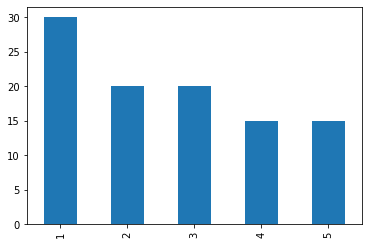

In [137]:
pd.Series(x1).value_counts(sort=False).plot(kind='bar')

<AxesSubplot:>

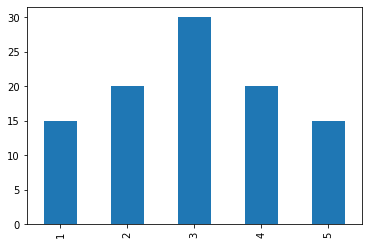

In [138]:
pd.Series(x2).value_counts(sort=False).plot(kind='bar')

<AxesSubplot:>

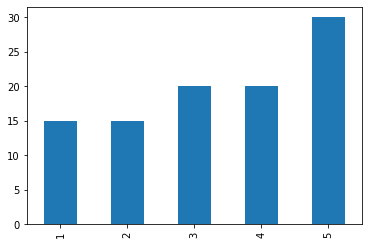

In [139]:
pd.Series(x3).value_counts(sort=False).plot(kind='bar')

In [140]:
print("오른쪽으로 꼬리가 긴 분포의 왜도:", skew(x1))
print("좌우대칭 분포 왜도:", skew(x2))
print("왼쪽으로 꼬리가 긴 분포의 왜도:", skew(x3))

오른쪽으로 꼬리가 긴 분포의 왜도: 0.3192801008486361
좌우대칭 분포 왜도: 0.0
왼쪽으로 꼬리가 긴 분포의 왜도: -0.31928010084863606


In [141]:
x1=[1]*20+[2]*20+[3]*20+[4]*20+[5]*20
x2=[1]*10+[2]*20+[3]*40+[4]*20+[5]*10
x3=[1]*5+[2]*15+[3]*60+[4]*15+[5]*5

In [142]:
print("전혀 뾰족하지 않을때 (평평할때) 첨도:", kurtosis(x1))
print("조금 뾰족할때 첨도:", kurtosis(x2))
print("매우 뾰족할때 첨도:", kurtosis(x3))

전혀 뾰족하지 않을때 (평평할때) 첨도: -1.3
조금 뾰족할때 첨도: -0.5
매우 뾰족할때 첨도: 0.8775510204081636


In [144]:
#50명의 영어점수 array
eng=df['english']
#Series로 변환하여 describe를 표시
eng.describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
Name: english, dtype: float64

In [151]:
freq,_=np.histogram(eng, bins=10, range=(0,100))

freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [159]:
#0~10, 10~20, ...이라는 문자열의 리스트를 작성
freq_class=[f'{i}~{i+10}' for i in range(0,100,10)]

#freq_class를 인덱스로 DataFrame을 작성
freq_dist_df=pd.DataFrame({'frequency':freq},index=pd.Index(freq_class, name='class'))


In [156]:
class_value=[(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [162]:
cum_rel_freq=np.cumsum(rel_freq)
cum_rel_freq

array([0.000, 0.000, 0.000, 0.040, 0.200, 0.520, 0.880, 1.000, 1.000,
       1.000])

In [166]:
#도수 분포표 확장
freq_dist_df['relative freq.']=rel_freq
freq_dist_df['relative freq.']=rel_freq
freq_dist_df['cum.relative freq.']=cum_rel_freq
freq_dist_df

,frequency,relative freq.,cum.relative freq.
class,,,
0~10,0,0.00,0.00
10~20,0,0.00,0.00
20~30,0,0.00,0.00
30~40,2,0.04,0.04
40~50,8,0.16,0.20
50~60,16,0.32,0.52
60~70,18,0.36,0.88
70~80,6,0.12,1.00
80~90,0,0.00,1.00


In [167]:
import pandas as pd

dataframe=pd.DataFrame({'Attendance': {0: 60, 1: 100, 2: 80,3: 78,4: 95},
                        'Obtained Marks': {0: 90, 1: 75, 2: 82, 3: 64, 4: 45}})
dataframe


,Attendance,Obtained Marks
0,60,90
1,100,75
2,80,82
3,78,64
4,95,45


In [169]:
series = dataframe.idxmax()
series

Attendance        1
Obtained Marks    0
dtype: int64

In [170]:
series = dataframe.idxmin()
series

Attendance        0
Obtained Marks    4
dtype: int64

In [174]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

KeyError: 'class value'

In [175]:
x=np.arange(1,12,1)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [179]:
print(np.percentile(x,10)) #백분위수
print(np.quantile(x,0.1)) #-0~1사이의 값으로 입력

2.0
2.0


In [180]:
print(np.percentile(x,25)) #25%
print(np.quantile(x,0.25)) #하사분위수

3.5
3.5


In [181]:
import matplotlib.pyplot as plt

(array([0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        2.000, 3.000, 3.000, 3.000, 7.000, 8.000, 6.000, 10.000, 5.000,
        2.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000]),
 array([0.000, 4.000, 8.000, 12.000, 16.000, 20.000, 24.000, 28.000,
        32.000, 36.000, 40.000, 44.000, 48.000, 52.000, 56.000, 60.000,
        64.000, 68.000, 72.000, 76.000, 80.000, 84.000, 88.000, 92.000,
        96.000, 100.000]),
 <BarContainer object of 25 artists>)

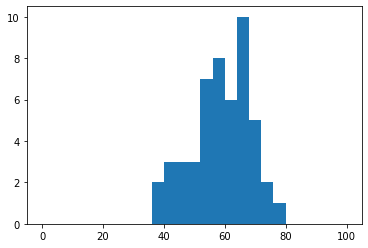

In [184]:
plt.hist(eng,bins=25,range=(0,100))
plt.show()

(array([0.000, 0.000, 0.000, 2.000, 8.000, 16.000, 18.000, 6.000, 0.000,
        0.000]),
 array([0.000, 10.000, 20.000, 30.000, 40.000, 50.000, 60.000, 70.000,
        80.000, 90.000, 100.000]),
 <BarContainer object of 10 artists>)

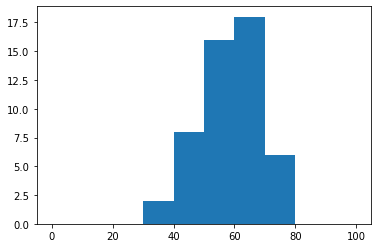

In [185]:
plt.hist(eng,bins=10,range=(0,100))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x213109bae20>,
 'caps': [<matplotlib.lines.Line2D at 0x213109c94c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x213109baa90>],
 'medians': [<matplotlib.lines.Line2D at 0x213109c9af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x213109c9e50>],
 'means': []}

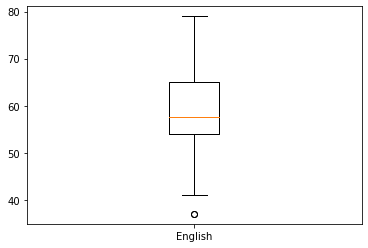

In [187]:
plt.boxplot(eng,labels=['English'])
plt.show()

In [188]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision', 3)


'%.3f'

Text(0.5, 0, 'english score')

Text(0, 0.5, 'mathematics score')

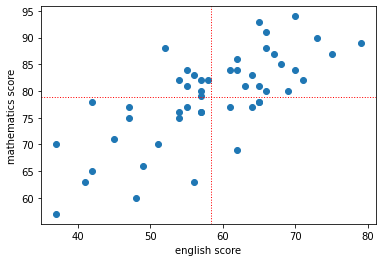

In [189]:
plt.scatter(df['english'], df['mathematics'])
plt.xlabel('english score')
plt.ylabel('mathematics score')

plt.axhline(y=df['mathematics'].mean(), color='r',
            linewidth=1,linestyle=':')
plt.axvline(x=df['english'].mean(), color='r',
            linewidth=1,linestyle=':')
plt.show()


In [190]:
summary_df = df.copy()
summary_df['eng_dev.'] =\
    summary_df['english'] - summary_df['english'].mean()
summary_df['math_dev.'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['productOfDev.'] =\
    summary_df['eng_dev.'] * summary_df['math_dev.']
summary_df.head()


,english,mathematics,eng_dev.,math_dev.,productOfDev.
student number,,,,,
1,42,65,-16.38,-13.88,227.354
2,69,80,10.62,1.12,11.894
3,56,63,-2.38,-15.88,37.794
4,41,63,-17.38,-15.88,275.994
5,57,76,-1.38,-2.88,3.974


In [196]:
summary_df['productOfDev.'].mean()



58.486

In [197]:
cov_mat[1,1]

NameError: name 'cov_mat' is not defined

In [193]:
np.cov(df['english'],df['mathematics'],ddof=0)

array([[94.116, 58.486],
       [58.486, 69.386]])

In [ ]:
cov_mat=np.cov(df['english'])

In [194]:
cov_mat[0.1],cov_mat[1,0]

NameError: name 'cov_mat' is not defined

In [201]:
cov_mat[0,0]

NameError: name 'cov_mat' is not defined

In [200]:
cov[mat[1,1]]

NameError: name 'cov' is not defined

In [199]:
np.var(df['english'],ddof=0),np.var(df['mathematics'],ddof=0)

(94.116, 69.386)

In [198]:
np.cov(df['english'], df['mathematics'], ddof=0)[0, 1] /\
    (np.std(df['english']) * np.std(df['mathematics']))


0.7237414863069244

In [205]:
np.corrcoef(df['english']),df['mathematics'])

SyntaxError: unmatched ')' (Temp/ipykernel_68364/678638482.py, line 1)

In [204]:
df.corr()

,english,mathematics
english,1.000,0.724
mathematics,0.724,1.000


Text(0.5, 0, 'english')

Text(0, 0.5, 'mathematics')

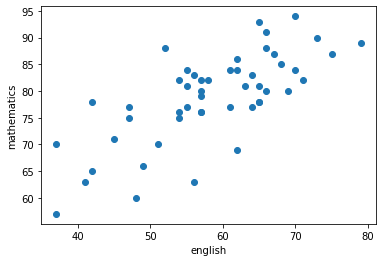

In [206]:
# 산점도
plt.scatter(df['english'],df['mathematics'] )
plt.xlabel('english')
plt.ylabel('mathematics')
plt.show()


Text(0.5, 0, 'english')

Text(0, 0.5, 'mathematics')

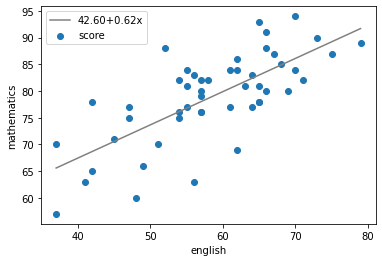

In [207]:
# 계수β_0와β_1를 구한다(기울기와 절편)
poly_fit = np.polyfit(df['english'],df['mathematics'], 1)

# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)

# 직선을 그리기 위한 x좌표
xs = np.linspace(df['english'].min(), df['english'].max())

# xs에 대응하는 y좌표
ys = poly_1d(xs)

plt.xlabel('english')
plt.ylabel('mathematics')
plt.scatter(df['english'],df['mathematics'], label='score')
plt.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

# 범례의 표시
plt.legend(loc='upper left')

plt.show()


Text(0.5, 0, 'english')

Text(0, 0.5, 'mathematics')

([<matplotlib.axis.XTick at 0x213123dc250>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

([<matplotlib.axis.YTick at 0x213123e41f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

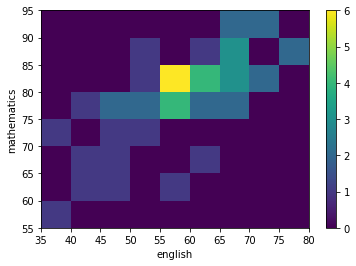

In [214]:
c=plt.hist2d(df['english'],df['mathematics'],bins=(9,8),range=[(35,80),(55,95)])
c[3]
plt.xlabel('english')
plt.ylabel('mathematics')
plt.xticks(c[1])
plt.yticks(c[2])
plt.colorbar(c[3])
plt.show()

In [224]:
np.random.choice([1,2,3],3)

array([3, 1, 2])

In [225]:
np.random.choice([1,2,3],3,replace=False)

array([1, 3, 2])

In [226]:
np.random.seed(123)
np.random.choice([1,2,3],3)

array([3, 2, 3])

In [220]:
df = pd.read_csv('./data/ch4_scores400.csv')
scores = df['score']
scores[:10]


0    76
1    55
2    80
3    80
4    74
5    61
6    81
7    76
8    23
9    80
Name: score, dtype: int64

In [228]:
np.random.seed(0)
sample=np.random.choice(scores,20)
sample.mean()

70.4

In [229]:
scores.mean()

69.530

In [232]:
for i in range(10):
    sample=np.random.choice(scores,20)
    print(f'{i+1}번째 무작위 추출로 얻은 데이터의 표본평균 {sample.mean()}')

1번째 무작위 추출로 얻은 데이터의 표본평균 69.15
2번째 무작위 추출로 얻은 데이터의 표본평균 69.5
3번째 무작위 추출로 얻은 데이터의 표본평균 71.35
4번째 무작위 추출로 얻은 데이터의 표본평균 69.4
5번째 무작위 추출로 얻은 데이터의 표본평균 71.5
6번째 무작위 추출로 얻은 데이터의 표본평균 70.65
7번째 무작위 추출로 얻은 데이터의 표본평균 69.95
8번째 무작위 추출로 얻은 데이터의 표본평균 68.8
9번째 무작위 추출로 얻은 데이터의 표본평균 69.15
10번째 무작위 추출로 얻은 데이터의 표본평균 71.25


In [233]:
dice=[1,2,3,4,5,6]
prob=[1/21,2/21,3/21,4/21,5/21,6/21]
prob

[0.048, 0.095, 0.143, 0.190, 0.238, 0.286]

In [235]:
np.random.choice(dice,p=prob)

6

In [236]:
num_trial=100
sample=np.random.choice(dice,num_trial,p=prob)
sample

array([5, 6, 3, 5, 2, 5, 6, 6, 4, 6, 3, 6, 6, 6, 5, 6, 4, 6, 5, 1, 4, 3,
       6, 5, 5, 5, 4, 2, 6, 3, 5, 3, 2, 6, 6, 6, 6, 6, 4, 2, 4, 3, 2, 2,
       6, 1, 6, 3, 2, 2, 5, 3, 4, 5, 6, 6, 3, 2, 2, 4, 3, 4, 5, 5, 3, 4,
       3, 6, 2, 5, 6, 6, 3, 4, 5, 3, 4, 3, 4, 1, 6, 2, 5, 4, 5, 6, 5, 1,
       4, 5, 5, 5, 3, 2, 4, 6, 3, 6, 5, 4])

In [240]:
freq,_=np.histogram(sample,bins=6,range=(1,7))
pd.DataFrame({'frequency':freq,'rel.freq':freq/num_trial}, index=pd.Index(np.arange(1,7),name='dice'))

,frequency,rel.freq
dice,,
1,4,0.04
2,13,0.13
3,17,0.17
4,17,0.17
5,22,0.22
6,27,0.27


(array([0.040, 0.130, 0.170, 0.170, 0.220, 0.270]),
 array([1.000, 2.000, 3.000, 4.000, 5.000, 6.000, 7.000]),
 <BarContainer object of 6 artists>)

[Text(1.5, 0, '1'),
 Text(2.5, 0, '2'),
 Text(3.5, 0, '3'),
 Text(4.5, 0, '4'),
 Text(5.5, 0, '5'),
 Text(6.5, 0, '6')]

Text(0.5, 0, 'dice')

Text(0, 0.5, 'relative frequency')

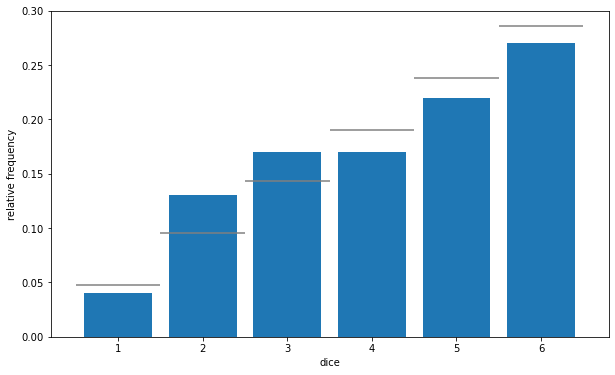

In [241]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()


(array([0.051, 0.096, 0.144, 0.192, 0.233, 0.284]),
 array([1.000, 2.000, 3.000, 4.000, 5.000, 6.000, 7.000]),
 <BarContainer object of 6 artists>)

Text(0.5, 0, 'dice')

Text(0, 0.5, 'relative frequency')

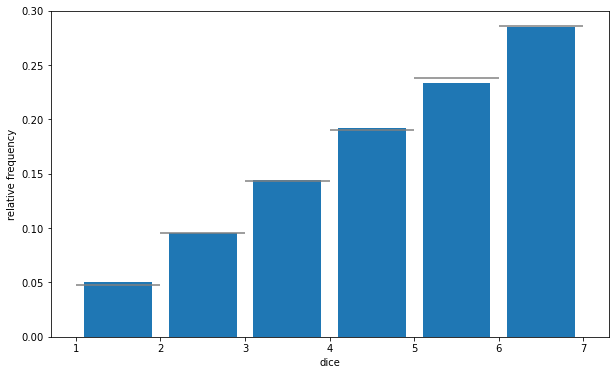

In [242]:
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# ax.set_xticks(np.linspace(1.5, 6.5, 6))
# ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()


(array([0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000, 0.000, 0.000, 0.000, 0.000, 0.003, 0.000, 0.000, 0.000,
        0.000, 0.003, 0.003, 0.000, 0.003, 0.000, 0.000, 0.003, 0.000,
        0.000, 0.000, 0.003, 0.000, 0.003, 0.005, 0.007, 0.007, 0.000,
        0.013, 0.013, 0.007, 0.005, 0.015, 0.010, 0.000, 0.022, 0.003,
        0.020, 0.025, 0.020, 0.025, 0.020, 0.013, 0.015, 0.033, 0.015,
        0.035, 0.022, 0.020, 0.015, 0.033, 0.040, 0.028, 0.025, 0.018,
        0.022, 0.020, 0.025, 0.018, 0.035, 0.025, 0.033, 0.025, 0.025,
        0.020, 0.018, 0.022, 0.007, 0.015, 0.022, 0.013, 0.005, 0.007,
        0.013, 0.020, 0.015, 0.010, 0.007, 0.000, 0.013, 0.005, 0.003,
        0.013]),
 array([0.000, 1.000, 2.000, 3.000, 4.000, 5.000, 6.000, 7.000, 8.000,
        9.000, 10.000, 11.000, 12.000, 13.000, 14.000, 15.000, 16.000,
        17.000, 18.000, 19.000, 20.000, 21.000, 22.000, 23.0

(20.000, 100.000)

(0.000, 0.042)

Text(0.5, 0, 'score')

Text(0, 0.5, 'relative frequency')

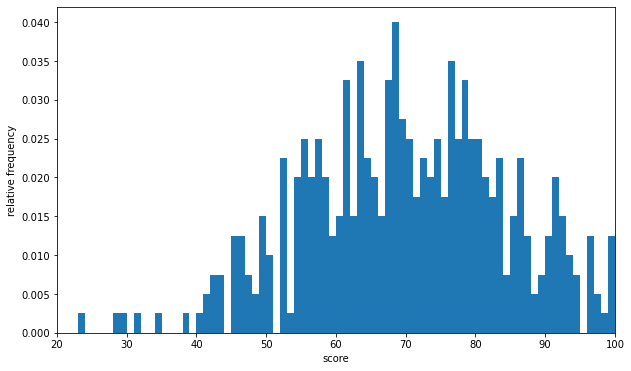

In [243]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()
